### K-Nearest Neighborhood Algorithm

- 데이터, 모듈 불러오기

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [5]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

- 모델 구축

In [9]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

KNeighborsClassifier()

In [10]:
# 데이터 예측
y_pred = clf.predict(X)

In [12]:
# 모델 성능평가
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

- **Cross-validation 을 활용한 최적의 k 찾기**

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
k_range = range(1, 100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    k_scores.append(scores.mean())

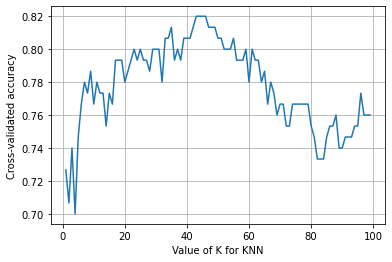

In [19]:
# 최적 k 도출을 위한 k_scores 시각화
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.grid()
plt.show() 
# k=45 정도에서 가장 정확도(accuracy)가 높음

- **거리에 따라 가중치(Weight)를 준 KNN**

c:\anaconda3\envs\fastcampus_ml\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
c:\anaconda3\envs\fastcampus_ml\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


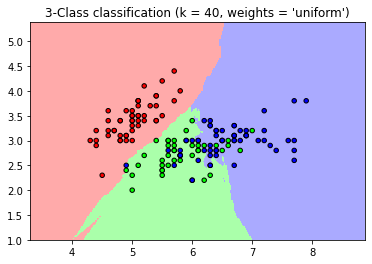

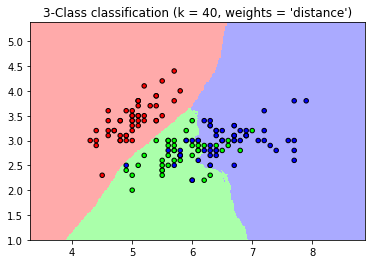

In [27]:
n_neighbors = 40

h = 0.02 # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X,y)
    
    # KNN 의 결정경계(Decision boundary) 시각화
    # 1. 메쉬그리드 생성
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # 2. 경계영역 시각화
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # 3. 학습 관측데이터 시각화
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolors='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.show()

In [30]:
"""
[ Uniform KNN 방식과 Distance KNN 방식의 비교 ]
거리에 따라 가중치를 적용한 경우, 경계영역이 조금더 매끈해진다.
이는 모델이 일반화되어 오버피팅 경향이 감소되는 효과로 볼 수 있다.
"""

'\n[ Uniform KNN 방식과 Distance KNN 방식의 비교 ]\n거리에 따라 가중치를 적용한 경우, 경계영역이 조금더 매끈해진다.\n이는 모델이 일반화되어 오버피팅 경향이 감소되는 효과로 볼 수 있다.\n'

### KNN Regressor 의 적용 

- 가상데이터 생성

In [45]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

- KNN regression 피팅

In [46]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

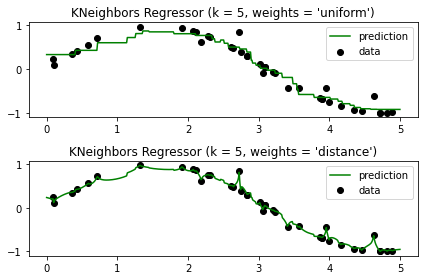

In [52]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    
    plt.subplot(2, 1, i+1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighbors Regressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [51]:
"""
[ Uniform KNN 방식과 Distance KNN 방식의 비교 ]
가중치를 두지않은 KNN(Uniform) 을 적용한 경우에는 튀는 값에 대해서 예측오차가 커지는 경향이 존재하나,
거리에 따라 가중치를 둔 KNN(Distance) 을 적용한 경우에는 튀는 값에 대해서도 예측수행이 가능함을 확인할 수 있다.
"""

'\n[ Uniform KNN 방식과 Distance KNN 방식의 비교 ]\n가중치를 두지않은 KNN(Uniform) 을 적용한 경우에는 튀는 값에 대해서 예측오차가 커지는 경향이 존재하나,\n거리에 따라 가중치를 둔 KNN(Distance) 을 적용한 경우에는 튀는 값에 대해서도 예측수행이 가능함을 확인할 수 있다.\n'